This tutorial presents how to solve with Deep Ritz method for a 1D Poisson problem with Dirichlet boundary conditions.

The problem is written as:
\begin{equation}
\begin{cases}
-\nabla \cdot \left ( a(x) \nabla u(x) \right ) = f(x) \text{ in } D, \\
u = 0 \text{ on } \Gamma_1 \cup \Gamma_2,
\end{cases}
\end{equation}
where $D$ is a square domain $[0,1]$, and $\Gamma_i$, with $i=1,2$, are the boundaries of the interval. Here,
\begin{equation}
a(x) = 
\begin{cases}
\frac{1}{2}, \; \text{ if } -1 < x < 0, \\
1, \; \text{ if } 0 \le x < 1,
\end{cases}
\end{equation}
and
\begin{equation}
f(x) = 
\begin{cases}
0, \; \text{ if } -1 < x < 0, \\
-2, \; \text{ if } 0 \le x < 1.
\end{cases}
\end{equation}
One can check that the exact solution is 
\begin{equation}
u(x) = 
\begin{cases}
\frac{2}{3} (x+1), \; \text{ if } -1 < x < 0, \\
x^2 - \frac{1}{3} x - \frac{2}{3}, \; \text{ if } 0 \le x < 1.
\end{cases}
\end{equation}

Denote
\begin{equation}
\mathcal{L}(v) = \int_D \frac{1}{2} a(x) |\nabla v(x)|^2 - f(x) v(x) \mathbb{d}x,
\end{equation}
then $u(x)$ is the minimizer of $\mathcal{L}(v)$ over the space $\mathcal{V} = \{ v \in H^1(D) \; | \; v = 0 \text{ on } \Gamma_1 \cup \Gamma_2 \}$. 

In [1]:
import numpy as np
import torch
from torch.nn import Tanh


from problem.pinn import PINN
from model.feed_forward import FeedForward
from problem.plotter import Plotter

from model.feed_forward import FeedForward
from poisson import Posisson1D_ritz as Poisson

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

problem = Poisson()
model = FeedForward(
    layers=[64, 64, 64, 64],
    func=Tanh,
    output_variables=problem.output_variables,
    input_variables=problem.input_variables
)
num_pts = 1000

pinn = PINN(
    problem,
    model,
    lr=0.001,
    error_norm='mean',
    regularizer=1e-8, 
    batch_size=num_pts,
    device=device,
    )



In [3]:
pinn.span_pts(n=1, mode='grid', locations=['gamma1', 'gamma2'])
pinn.span_pts(n=num_pts, mode='grid', locations=['D'])

pinn.train(10000, 100)
# pinn.save_state('pinn_ritz.poisson')

              sum          gamma1nil_di gamma2nil_di Dritz_equati 
[epoch 00000] 5.375299e+00 2.660648e+00 2.647227e+00 6.742480e-02 
              sum          gamma1nil_di gamma2nil_di Dritz_equati 
[epoch 00001] 2.264790e-01 2.704575e-01 1.972212e-02 -6.370066e-02 
              sum          gamma1nil_di gamma2nil_di Dritz_equati 
[epoch 00100] -5.210678e-02 1.629815e-04 1.759782e-03 -5.402954e-02 
              sum          gamma1nil_di gamma2nil_di Dritz_equati 
[epoch 00200] -1.157208e-01 1.927388e-04 1.829424e-03 -1.177430e-01 
              sum          gamma1nil_di gamma2nil_di Dritz_equati 
[epoch 00300] -1.252060e-01 2.617483e-04 1.768481e-03 -1.272362e-01 
              sum          gamma1nil_di gamma2nil_di Dritz_equati 
[epoch 00400] -1.661065e-01 3.391069e-04 1.393074e-03 -1.678387e-01 
              sum          gamma1nil_di gamma2nil_di Dritz_equati 
[epoch 00500] -2.376346e-01 8.717248e-05 1.770104e-03 -2.394919e-01 
              sum          gamma1nil_di gamma2nil_d

-0.24392308294773102

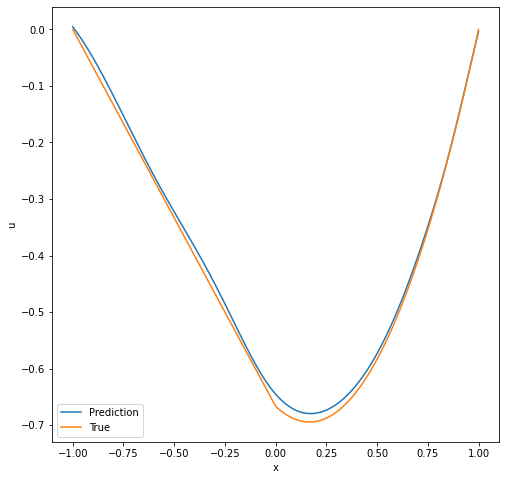

In [4]:
plotter = Plotter()
plotter.plot(pinn)

In [6]:
# pinn.save_state('pinn_ritz.poisson')